<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/tutoria_8_ML_RandomForest_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

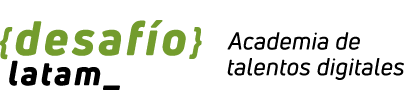

#<center><font color='green'>Random Forest</font></center>

In [1]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import itertools


In [2]:
# Cargar el dataset de Seaborn (usaremos el conjunto Iris como ejemplo)
iris = sns.load_dataset("iris")

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Dividir el dataset en características (X) y etiquetas (y)
X = iris.drop("species", axis=1)
y = iris["species"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [11]:
# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=123)

# Definir la cuadrícula de hiperparámetros para buscar
param_grid = {
    "n_estimators": [10, 50],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4],
    'criterion' : ['gini', 'entropy']
}

In [12]:
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo con los hiperparámetros óptimos
best_rf_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Generar un informe de clasificación
class_report = classification_report(y_test, y_pred, target_names=iris["species"].unique())

# Mostrar los hiperparámetros óptimos encontrados
print("Hiperparámetros óptimos:")
print(grid_search.best_params_)

Hiperparámetros óptimos:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 10}


In [13]:
print(class_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



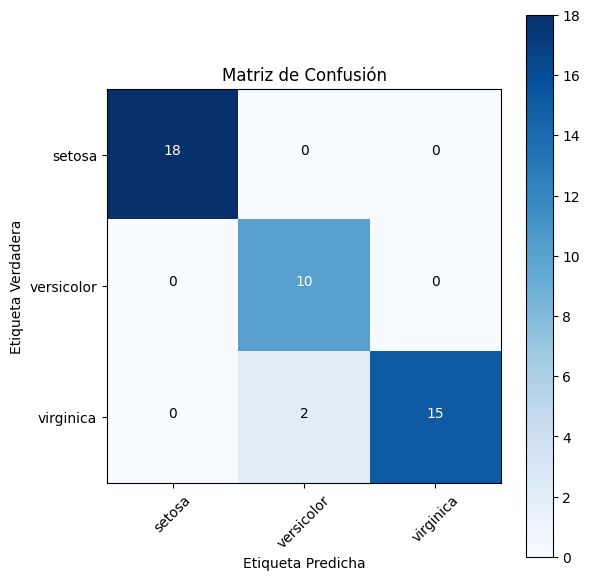

In [7]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Función para mostrar la matriz de confusión
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

# Definir las clases
class_names = iris["species"].unique()

# Mostrar la matriz de confusión
plot_confusion_matrix(cm, classes=class_names)
plt.show()

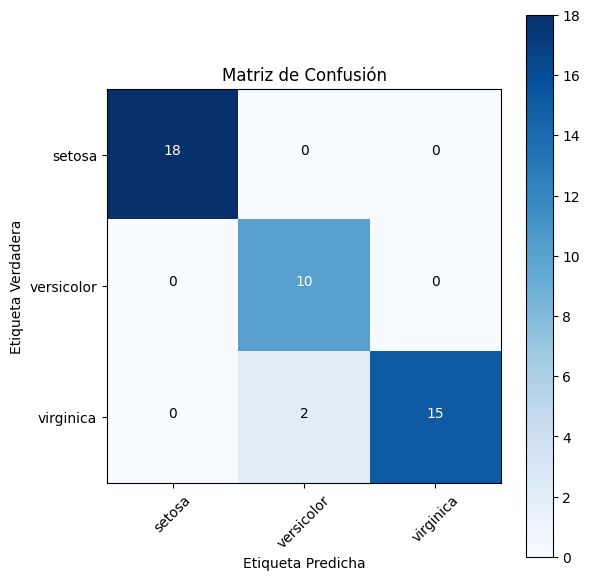

In [14]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Función para mostrar la matriz de confusión
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

# Definir las clases
class_names = iris["species"].unique()

# Mostrar la matriz de confusión
plot_confusion_matrix(cm, classes=class_names)
plt.show()

In [15]:
### ayuda a la prueba

business = pd.read_excel('business.xlsx')
economy = pd.read_excel('economy.xlsx')
business.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


In [16]:
economy.head(5)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955


In [17]:
print(business.shape)

(93487, 11)


In [19]:
business['airline'].value_counts()

,count
airline,
Vistara,60589
Air India,32898


In [18]:
print(economy.shape)

(206774, 11)


In [20]:
economy['airline'].value_counts()

,count
airline,
Vistara,67270
Air India,47996
Indigo,43120
GO FIRST,23177
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


In [21]:
business['tipo_boleto'] = 'business'
economy['tipo_boleto'] = 'economy'

df = pd.concat([business,economy])
df.dtypes

,0
date,datetime64[ns]
airline,object
ch_code,object
num_code,int64
dep_time,object
from,object
time_taken,object
stop,object
arr_time,object
to,object


In [ ]:
## trabajar con los formatos de datos


###función de calidad de los datos

def data_quality_analysis(df):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Columna', 'Tipo de dato', 'Valores únicos', 'Valores faltantes'])
    # Obtener información general del dataframe
    columns = df.columns
    data_types = df.dtypes.to_list()
    unique_values = [df[column].nunique() for column in columns]
    missing_values = [df[column].isnull().sum() for column in columns]
    # Llenar el nuevo dataframe con los resultados
    result_df['Columna'] = columns
    result_df['Tipo de dato'] = data_types
    result_df['Valores únicos'] = unique_values
    result_df['Valores faltantes'] = missing_values
    return result_df



In [22]:
df['time_taken'].value_counts()

02:10

,count
time_taken,
02h 10m,4242
02h 15m,4036
02h 45m,2879
02h 05m,2755
02h 50m,2323
...,...
38h 45m,1
1.01h m,1
1.02h m,1


In [ ]:
## analisis exploratorio

analysis_result = data_quality_analysis(df).set_index('Columna')
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(30, 30))
for n, i in enumerate(list(df.columns)):
    plt.subplot(6, 4, n + 1)
    if analysis_result.loc[i, 'Tipo de dato']=='object':
        sns.countplot(y= df[i], order=df[i].value_counts().iloc[:7].index)
        plt.title('Frecuencias para {}'.format(i))
    else:
        sns.distplot(df[i])
        plt.title('Distribución para {}'.format(i))
    plt.tight_layout()


df.groupby('date').agg(q_boletos=('date', 'count')).plot()
plt.xticks(rotation=60)
plt.show()


### box plot de distintas variables vs el precio y por tipo de boleto


columna extra segun la hora partida: madrugada, mañana y tarde




separar las variables e categorias y numericas

en las numericas hacer las correlaciones respecto precio

sns.heatmap()


para las categoricas test anova vs el precio.



LienarRegression()
Lasso()
Ridge()
ElasticNet()
RandomForestRegressor()

GridSearchCV()

r2_scorE
MAE
MSE
MAPE


graficos evaluacion